In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [2]:
black = "#000000"
blue = "#16469D"
red = "#BD202D"
green = "#00A14B"
lightblue = "#4B96D1"
orange = "#F16521"
lavender = "#9F6EAF"

evangelista = [black, blue, red, green, lightblue, orange, lavender] 

In [5]:
npz = np.load("learn_2020-12-10_21h22m02s.npz")
end = len(npz["it"])//2
charges = npz["charges"][:end]

In [8]:
from waterbox import WaterBox
waterbox = WaterBox()

In [9]:
defaults = {
    "bond_length": waterbox.ff.get_bond("OT", "HT")[1],
    "bond_k": waterbox.ff.get_bond("OT", "HT")[0],
    "angle": waterbox.ff.get_angle("HT", "OT", "HT")[1],
    "angle_k": waterbox.ff.get_angle("HT", "OT", "HT")[0],
    "charges": np.array([
        waterbox.ff.get_charge(at) 
        for at in ["OT", "HT", "CLA", "SOD"]
    ]),
    "sigma": np.array([
        waterbox.ff.get_LJ(at)[0] 
        for at in ["CLA", "HT", "OT", "SOD"]
    ]),
    "epsilon": np.array([
        waterbox.ff.get_LJ(at)[1] 
        for at in ["CLA", "HT", "OT", "SOD"]
    ]),
}

In [10]:

plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.serif": ["Helvetica"],
})

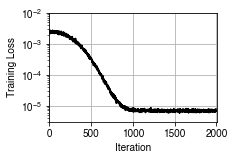

In [66]:
fig, ax = plt.subplots(figsize=(3,2))

ax.plot(npz["loss"][:end], color="black")
ax.set_ylabel("Training Loss")
ax.set_xlabel("Iteration")
ax.set_xlim(0, end+6)
#ax2.set_ylim(0, 0.003) #1e-6, 1e-2)
ax.set_ylim(3e-6, 1e-2) #0.003) #1e-6, 1e-2)
#ax2.tick_params(axis='y', which='minor')
#locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
#ax2.yaxis.set_minor_locator(locmin)
#ax2.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
y_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 5)
ax.yaxis.set_major_locator(y_major)
y_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
ax.yaxis.set_minor_locator(y_minor)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.semilogy()
ax.grid()


fig.savefig("loss_water.png", dpi=360, extra_bbox_agents=(t1, t2, t3, t4), bbox_inches="tight")


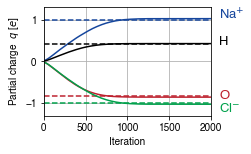

In [67]:
fig, ax = plt.subplots(figsize=(3,2))

ax.plot(-charges[:,1], color=blue, label=r"Na$^{+}$")
ax.axhline(-defaults["charges"][2], ls="--", color=blue)

ax.plot(-0.5*charges[:,0], color=black, label="H")
ax.axhline(-0.5*defaults["charges"][0], ls="--", color=black)

ax.plot(charges[:,0], color=red, ls="-", label="O")
ax.axhline(defaults["charges"][0], ls="--", color=red)

ax.plot(charges[:,1], color=green, ls="-", label=r"Cl$^{-}$")
ax.axhline(defaults["charges"][2], ls="--", color=green)

t1 = ax.annotate("Na$^{+}$", xy=(1800, -0.5*defaults["charges"][0]), color=blue, fontsize=13, xytext=(2100, 1.0))
t2 = ax.annotate("H", xy=(1800, -0.5*defaults["charges"][0]), color=black, fontsize=13, xytext=(2100, 0.4))
t3 = ax.annotate("O", xy=(1800, defaults["charges"][0]), color=red, fontsize=13, xytext=(2100, -0.9))
t4 = ax.annotate("Cl$^{-}$", xy=(2000, defaults["charges"][2]), color=green, fontsize=13, xytext=(2100, -1.2))


ax.set_ylim(-1.3, 1.3)
ax.set_xlim(0, end+6)
ax.grid()

ax.set_ylabel("Partial charge  $q$ [$e$]")
ax.set_xlabel("Iteration")
fig.savefig("charges.png", dpi=360, extra_bbox_agents=(t1, t2, t3, t4), bbox_inches="tight")

